<a href="https://colab.research.google.com/github/rhaymisonbetini/CNN_IFS/blob/main/CONVOLUCAO_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite os 9 valores do kernel, separados por espaço: 0.25 0.1 0.23 0.79 0.69 0.69  -0.47  -0.89  -0.58


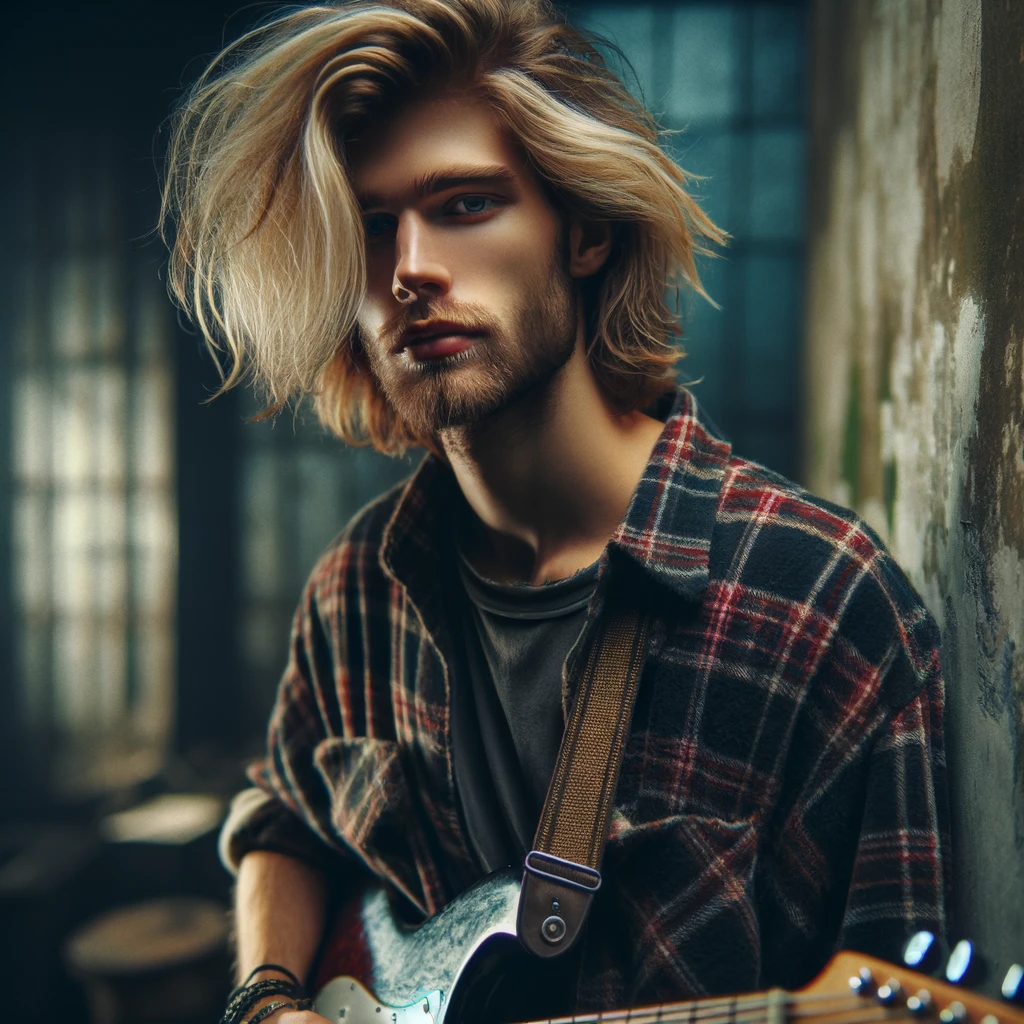

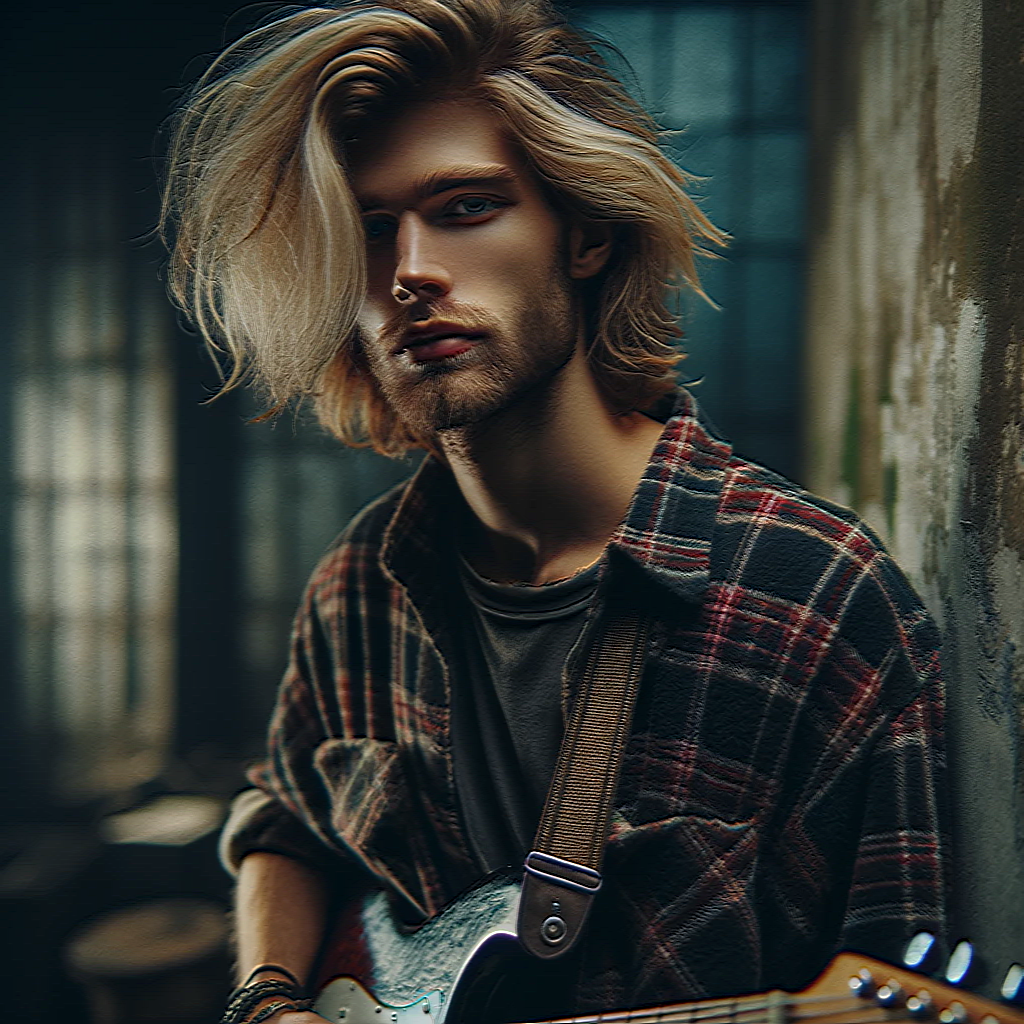

In [8]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Carregar a imagem (substitua 'sua_imagem.jpg' pelo caminho da sua imagem)
imagem = cv2.imread('kurt.jpeg')

# Solicitar ao usuário os valores do kernel
kernel_values = input("Digite os 9 valores do kernel, separados por espaço: ")
kernel_list = [float(val) for val in kernel_values.split()]
kernel = np.array(kernel_list).reshape((3, 3))

# Aplicar o kernel à imagem
imagem_modificada = cv2.filter2D(imagem, -1, kernel)

# Mostrar a imagem original e a modificada
cv2_imshow(imagem)
cv2_imshow(imagem_modificada)

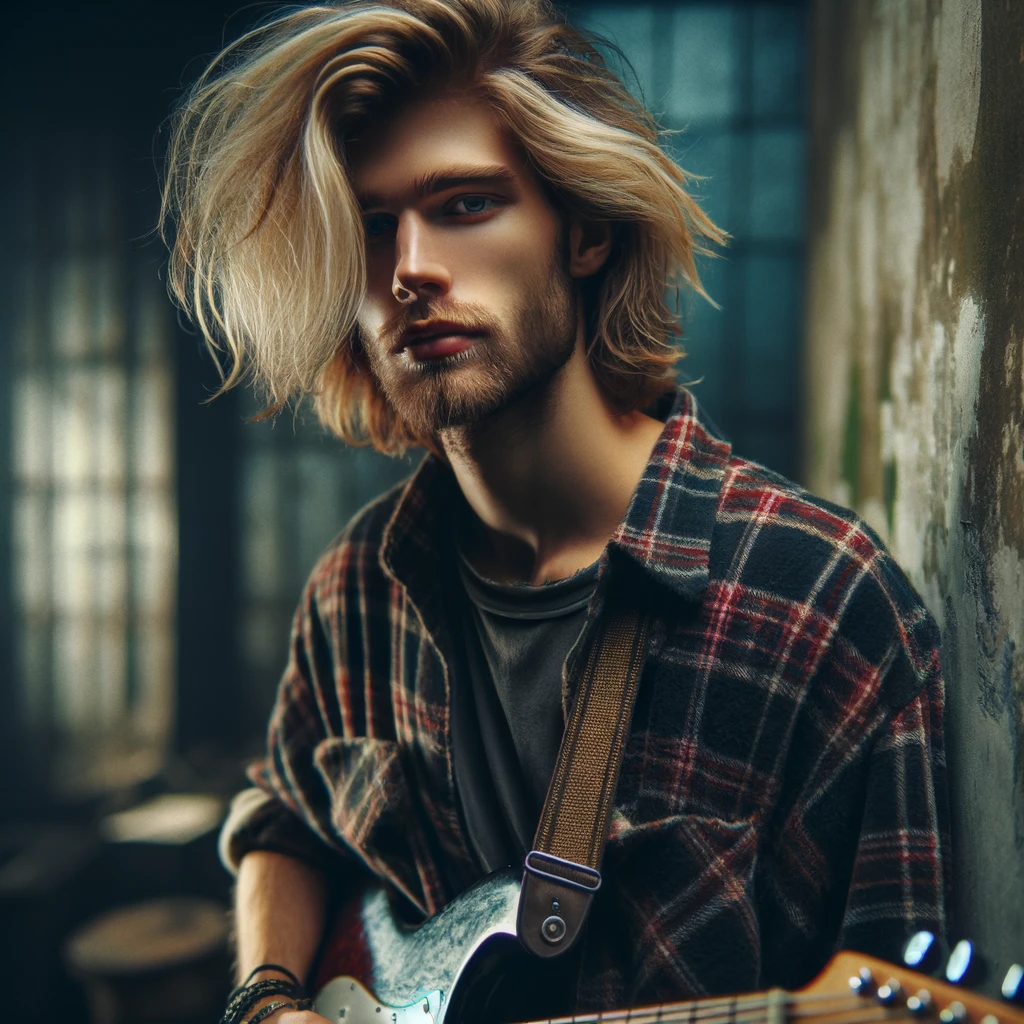

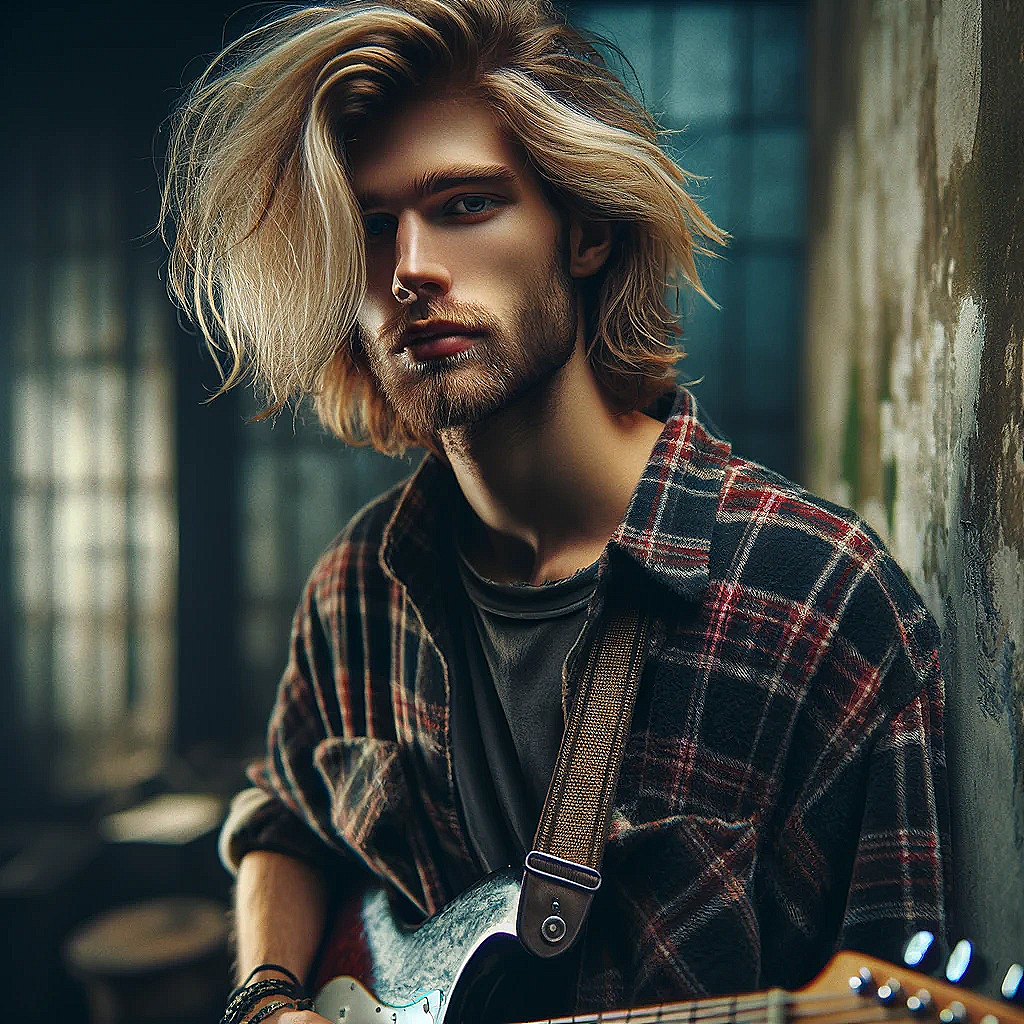

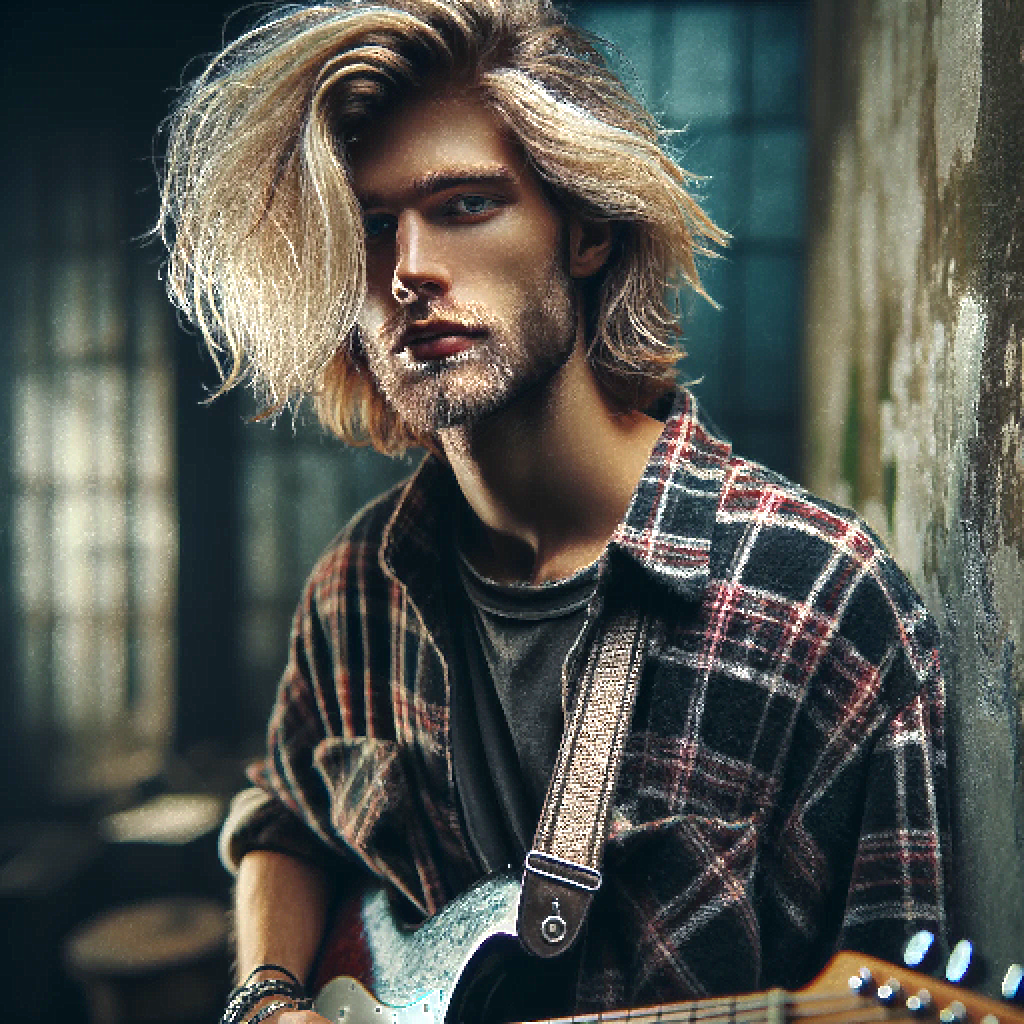

Dimensões após o flattening: (3145728,)


In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Carregar a imagem (substitua 'sua_imagem.jpg' pelo caminho da sua imagem)
imagem = cv2.imread('kurt.jpeg')

# Definindo o kernel (pode ser ajustado)
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Aplicar o kernel à imagem
imagem_conv = cv2.filter2D(imagem, -1, kernel)

# Função para max pooling
def max_pooling(img, pool_size):
    pooled_img = img.copy()
    for i in range(0, img.shape[0], pool_size):
        for j in range(0, img.shape[1], pool_size):
            pooling_region = img[i:i+pool_size, j:j+pool_size]
            pooled_img[i:i+pool_size, j:j+pool_size] = np.max(pooling_region, axis=(0, 1))
    return pooled_img

# Aplicar max pooling
pool_size = 2  # Tamanho da janela de pooling
imagem_pool = max_pooling(imagem_conv, pool_size)

# Mostrar a imagem original, após convolução e após pooling
cv2_imshow(imagem)
cv2_imshow(imagem_conv)
cv2_imshow(imagem_pool)
imagem_flat = imagem_pool.flatten()
print("Dimensões após o flattening:", imagem_flat.shape)

In [4]:
imagem_flat

array([ 25,  17,   0, ...,  46,  90, 146], dtype=uint8)

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices("GPU")[0], True)
tf.config.run_functions_eagerly(False)

In [11]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
model = tf.keras.models.Sequential()


In [7]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=[32,32,3]))

In [8]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))

In [9]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="valid"))

In [10]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))

In [11]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))

In [12]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="valid"))

In [13]:
model.add(tf.keras.layers.Flatten())

In [14]:
model.add(tf.keras.layers.Dense(units=256, activation="relu"))

In [15]:
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

In [17]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

In [18]:
model.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 15s 11ms/step - loss: 1.4704 - sparse_categorical_accuracy: 0.4698
Epoch 2/10
391/391 [==============================] - 4s 10ms/step - loss: 1.0091 - sparse_categorical_accuracy: 0.6442
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 0.8002 - sparse_categorical_accuracy: 0.7188
Epoch 4/10
391/391 [==============================] - 4s 10ms/step - loss: 0.6620 - sparse_categorical_accuracy: 0.7682
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 0.5383 - sparse_categorical_accuracy: 0.8097
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 0.4341 - sparse_categorical_accuracy: 0.8477
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.3161 - sparse_categorical_accuracy: 0.8893
Epoch 8/10
391/391 [==============================] - 4s 10ms/step - loss: 0.2246 - sparse_categorical_accuracy: 0.9224
Epoch 9/10
391/391 [===================

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1809 - sparse_categorical_accuracy: 0.7450


In [37]:
import numpy as np

imagem = np.expand_dims(X_test[1], axis=0)
predict = model.predict(imagem)

1/1 [==============================] - 0s 18ms/step


In [38]:
indice_maximo = np.argmax(predict[0])

In [39]:
classe_predita = class_names[indice_maximo]

print("Classe prevista:", classe_predita)

Classe prevista: ship


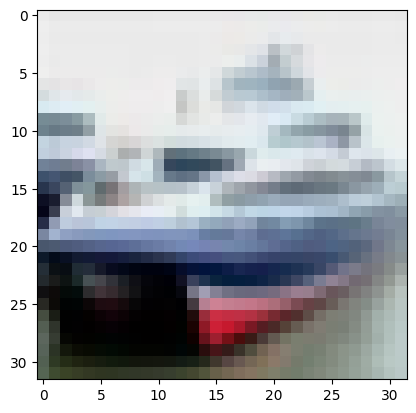

In [36]:
plt.imshow(X_test[1])